In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rcParams.update(params)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
data_transmon_stat = np.load('../../data/transmon/transmon_static_spectrum_wq=0.23.npz')
data_fluxonium_stat = np.load('../../data/fluxonium/fluxonium_static_spectrum_wq=0.15.npz')

data_transmon_ad = np.load('../../data/transmon/transmon_floquet_spectrum_w_r=0.77.npz')
data_transmon_diab = np.load('../../data/transmon/transmon_floquet_spectrum_w_r=1.14.npz')

data_fluxonium_ad = np.load('../../data/fluxonium/fluxonium_floquet_spectrum_w_r=0.89.npz')
data_fluxonium_diab = np.load('../../data/fluxonium/fluxonium_floquet_spectrum_w_r=2.92.npz')

data_transmon = [data_transmon_ad, data_transmon_diab]
data_fluxonium = [data_fluxonium_ad, data_fluxonium_diab]

evals_transmon = []
evals_fluxonium = []

wr_transmon = []
wr_fluxonium = []

ref_static_transmon, A_list_transmon, wq_transmon = data_transmon_stat['evals'], data_transmon_stat['e0_list'], data_transmon_stat['wq']
ref_static_fluxonium, A_list_fluxonium, wq_fluxonium = data_fluxonium_stat['evals'], data_fluxonium_stat['e0_list'], data_fluxonium_stat['wq']

for j in range(2):
    evals_transmon.append(data_transmon[j]['evals_list'][0])
    evals_fluxonium.append(data_fluxonium[j]['evals_list'][0])

    wr_transmon.append(data_transmon[j]['w_r'])
    wr_fluxonium.append(data_fluxonium[j]['w_r'])

reff_transmon = ref_static_transmon[int((np.shape(ref_static_transmon)[0]-1)/2),0]
reff_fluxonium = ref_static_fluxonium[int((np.shape(ref_static_fluxonium)[0]-1)/2),0]

ref_static_transmon = ref_static_transmon - np.min(reff_transmon)
evals_transmon = evals_transmon - np.min(reff_transmon)

ref_static_fluxonium = ref_static_fluxonium - np.min(reff_fluxonium)
evals_fluxonium = evals_fluxonium - np.min(reff_fluxonium)

In [4]:
data_transmon = np.load('../../data/transmon/transmon_g_parallel.npz', allow_pickle=True)
data_fluxonium = np.load('../../data/fluxonium/fluxonium_g_parallel.npz', allow_pickle=True)

Alist_transmon, wlist_transmon, g_parallel_transmon = data_transmon['Alist'], data_transmon['wlist'], data_transmon['g_parallel']
Alist_fluxonium, wlist_fluxonium, g_parallel_fluxonium = data_fluxonium['Alist'], data_fluxonium['wlist'], data_fluxonium['g_parallel']

/home/alessandro/python/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/alessandro/python/venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_53562/105807779.py:155: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(fname, bbox_inches='tight')
/tmp/ipykernel_53562/105807779.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_53562/105807779.py:163: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


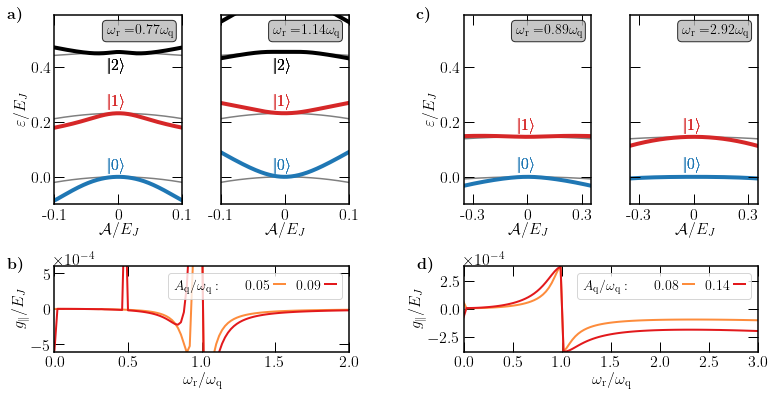

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

props = dict(boxstyle='round', facecolor='#b8b8b8a6', alpha=0.8)

fig = plt.figure(figsize=(12.6,6.2), layout="constrained")

gs0 = gridspec.GridSpec(2, 6, figure=fig, height_ratios=[1,0.45], width_ratios=[0.5,0.5,0.00,0.00,0.5,0.5], hspace=0.45, wspace=0.45)

ax_floquet_transmon_ad = fig.add_subplot(gs0[0,0])
ax_floquet_transmon_diab = fig.add_subplot(gs0[0,1])

ax_floquet_transmon = [ax_floquet_transmon_ad, ax_floquet_transmon_diab]

ax_floquet_fluxonium_ad = fig.add_subplot(gs0[0,4])
ax_floquet_fluxonium_diab = fig.add_subplot(gs0[0,5])

ax_floquet_fluxonium = [ax_floquet_fluxonium_ad, ax_floquet_fluxonium_diab]

ax_g_parallel_transmon = fig.add_subplot(gs0[1,0:2])
ax_g_parallel_fluxonium = fig.add_subplot(gs0[1,4:6])

################### Spectrum ##################################
for idx in range(2):
    ax_floquet_transmon[idx].plot(A_list_transmon, ref_static_transmon[:,0], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_transmon[idx].plot(A_list_transmon, ref_static_transmon[:,1], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_transmon[idx].plot(A_list_transmon, ref_static_transmon[:,2], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_transmon[idx].plot(A_list_transmon, ref_static_transmon[:,3], c='black', zorder=0, alpha=0.5, ls='-')
    
    ax_floquet_transmon[idx].plot(A_list_transmon, evals_transmon[idx][:,0], zorder=1, lw=4, c='tab:blue')
    ax_floquet_transmon[idx].plot(A_list_transmon, evals_transmon[idx][:,1], zorder=1, lw=4, c='tab:red')
    ax_floquet_transmon[idx].plot(A_list_transmon, evals_transmon[idx][:,2], zorder=1, lw=4, c='black', alpha=1)
    ax_floquet_transmon[idx].plot(A_list_transmon, evals_transmon[idx][:,3], zorder=1, lw=4, c='black', alpha=1)

    ax_floquet_transmon[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_transmon[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_transmon[idx].set_xlabel(r'$\mathcal{A}/E_J$', labelpad=-1)
    ax_floquet_transmon[idx].text(0.92, 0.9, r'$\omega_{\text{r}}=$'+str(np.round(wr_transmon[idx]/wq_transmon,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_transmon[idx].transAxes, size=14)
    
    ax_floquet_transmon[idx].text(0.56,0.778,r'$\pmb{\left\vert 2 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon[idx].transAxes, color = 'black', \
            fontsize=16)
    ax_floquet_transmon[idx].text(0.56,0.59,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon[idx].transAxes, color = 'tab:red', \
            fontsize=16)
    ax_floquet_transmon[idx].text(0.56,0.25,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_floquet_transmon[idx].transAxes, color = 'tab:blue', \
            fontsize=16)
    
    ax_floquet_transmon[idx].set_ylim([-0.1,0.59])
    ax_floquet_transmon[idx].set_xticks([-0.1,0.0,0.1],['-0.1','0','0.1'])
    ax_floquet_transmon[idx].set_yticks([0.0,0.2,0.4],['0.0','0.2','0.4'])

ax_floquet_transmon[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_transmon[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_floquet_transmon[0].set_ylabel(r'$\varepsilon/E_J$', labelpad=2)

for idx in range(2):
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, ref_static_fluxonium[:,0], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, evals_fluxonium[idx][:,0], zorder=1, lw=4)
    
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, ref_static_fluxonium[:,1], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, evals_fluxonium[idx][:,1], c='tab:red', zorder=1, lw=4)
    
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, ref_static_fluxonium[:,2], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, evals_fluxonium[idx][:,2], c='black', zorder=1, lw=4)
    
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, ref_static_fluxonium[:,3], c='black', zorder=0, alpha=0.5, ls='-')
    ax_floquet_fluxonium[idx].plot(A_list_fluxonium, evals_fluxonium[idx][:,3], c='black', zorder=1, lw=4)
    
    ax_floquet_fluxonium[idx].xaxis.set_tick_params(direction="in", which='both')
    ax_floquet_fluxonium[idx].yaxis.set_tick_params(direction="in", which='both')

    ax_floquet_fluxonium[idx].set_xlabel(r'$\mathcal{A}/E_J$', labelpad=-1)
    ax_floquet_fluxonium[idx].text(0.92, 0.9, r'$\omega_{\text{r}}=$'+str(np.round(wr_fluxonium[idx]/wq_fluxonium,2))+r'$\omega_{\text{q}}$', ha='right', bbox=props, \
               transform=ax_floquet_fluxonium[idx].transAxes, size=14)

    ax_floquet_fluxonium[idx].text(0.57,0.46,r'$\pmb{\left\vert 1 \right\rangle}$', ha='right', va='top', transform=ax_floquet_fluxonium[idx].transAxes, color = 'tab:red', \
        fontsize=16)
    ax_floquet_fluxonium[idx].text(0.57,0.255,r'$\pmb{\left\vert 0 \right\rangle}$', ha='right', va='top', transform=ax_floquet_fluxonium[idx].transAxes, color = 'tab:blue', \
        fontsize=16)

    ax_floquet_fluxonium[idx].set_ylim([-0.1,0.59])
    ax_floquet_fluxonium[idx].set_xticks([-0.3,0.0,0.3],['-0.3','0','0.3'])
    ax_floquet_fluxonium[idx].set_yticks([0.0,0.2,0.4],['0.0','0.2','0.4'])

ax_floquet_fluxonium[0].set_ylabel(r'$\varepsilon/E_J$', labelpad=2)

ax_floquet_fluxonium[0].tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_floquet_fluxonium[1].tick_params(top=True, bottom=True, left=True, right=True, labelleft=False,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

#ax_floquet_transmon[idx].set_title('Transmon', fontsize=16)
#ax_floquet_fluxonium[idx].set_title('Fluxonium', fontsize=16)

########## g_parallel #####################
cmap_plot = plt.get_cmap('YlOrRd')
norm = plt.Normalize(-2,2)
colors = cmap_plot(norm([i for i in range(len(Alist_transmon))]))

for idx, A_Q in enumerate(Alist_transmon):
    ax_g_parallel_transmon.plot(wlist_transmon/wq_transmon, g_parallel_transmon[:,idx], label=np.round(A_Q/wq_transmon,2), color=colors[idx], lw=2)
    ax_g_parallel_fluxonium.plot(wlist_fluxonium/wq_fluxonium, g_parallel_fluxonium[:,idx], label=np.round(A_Q/wq_fluxonium,2), color=colors[idx], lw=2)

ax_g_parallel_transmon.xaxis.set_tick_params(direction="in", which='both')
ax_g_parallel_transmon.yaxis.set_tick_params(direction="in", which='both')

ax_g_parallel_fluxonium.xaxis.set_tick_params(direction="in", which='both')
ax_g_parallel_fluxonium.yaxis.set_tick_params(direction="in", which='both')

ax_g_parallel_transmon.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')
ax_g_parallel_fluxonium.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_g_parallel_transmon.set_ylabel(r'$g_\parallel/E_J$', labelpad=2)
ax_g_parallel_fluxonium.set_ylabel(r'$g_\parallel/E_J$', labelpad=2)
import matplotlib.ticker as mticker

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3,2))
formatter2 = mticker.ScalarFormatter(useMathText=True)
formatter2.set_powerlimits((-3,2))

ax_g_parallel_transmon.yaxis.set_major_formatter(formatter)
ax_g_parallel_fluxonium.yaxis.set_major_formatter(formatter2)

ax_g_parallel_transmon.set_ylim([-0.0006,0.0006])

ax_g_parallel_transmon.set_xlabel(r'$\omega_{\rm r}/\omega_{\rm q}$', labelpad=2)
ax_g_parallel_fluxonium.set_xlabel(r'$\omega_{\rm r}/\omega_{\rm q}$', labelpad=2)

h, l = ax_g_parallel_transmon.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = [r'$A_{\text{q}}/\omega_{\text{q}}:$'] + l  # Merging labels
leg = ax_g_parallel_transmon.legend(handles, labels, fontsize="14", loc='upper right', ncol=3, handlelength=0.8, markerfirst=False, handletextpad=0.3, columnspacing=0.8)

h, l = ax_g_parallel_fluxonium.get_legend_handles_labels() # Extracting handles and labels
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = [r'$A_{\text{q}}/\omega_{\text{q}}:$'] + l  # Merging labels
leg = ax_g_parallel_fluxonium.legend(handles, labels, fontsize="14", loc='upper right', ncol=3, handlelength=0.8, markerfirst=False, handletextpad=0.3, columnspacing=0.8)

fname = '../figures/figS4'

fname = fname + '.pdf'
plt.savefig(fname, bbox_inches='tight')

labels = ['a)','b)','c)','d)']
ax_floquet_transmon[0].text(-0.37, 0.98, r'\bf{'+labels[0]+'}', size=16, color='black', transform=ax_floquet_transmon[0].transAxes)
ax_floquet_fluxonium[0].text(-0.37, 0.98, r'\bf{'+labels[2]+'}', size=16, color='black', transform=ax_floquet_fluxonium[0].transAxes)
ax_g_parallel_transmon.text(-0.16, 0.98, r'\bf{'+labels[1]+'}', size=16, color='black', transform=ax_g_parallel_transmon.transAxes)
ax_g_parallel_fluxonium.text(-0.16, 0.98, r'\bf{'+labels[3]+'}', size=16, color='black', transform=ax_g_parallel_fluxonium.transAxes)

plt.tight_layout()

fig.savefig(fname, bbox_inches='tight')